IMPORTING LIBRARIES

In [334]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

LOADING THE DATA & PREPROCESSING THE DATA

In [335]:
calories_data = pd.read_csv('/Users/nirva/Desktop/UniStuff/TCR Stuff/assignment answers/Dataset_Calories, Exercise and Mobile/calories.csv')
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [336]:
exercise_data = pd.read_csv('/Users/nirva/Desktop/UniStuff/TCR Stuff/assignment answers/Dataset_Calories, Exercise and Mobile/exercise.csv')
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two datasets i.e calories dataset and exercise dataset

In [337]:
combined_data = pd.concat([exercise_data,calories_data['Calories']], axis=1)
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


We have 15000 people and 9 features for them

In [338]:
combined_data.shape

(15000, 9)

In [339]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [340]:
combined_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

ANALYSING THE DATA

We obtain the number of values in each column, mean of values, standard deviation, minimum and maximum values for each column.

In [341]:
combined_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


VISUALIZATION OF DATA

In [342]:
sns.set()

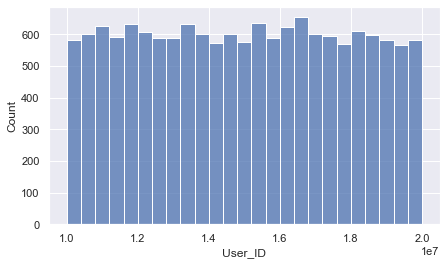

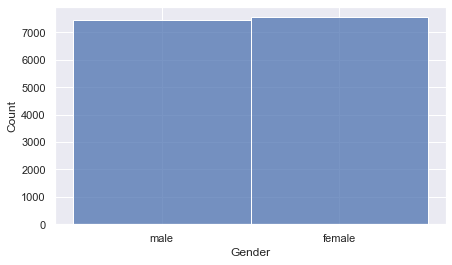

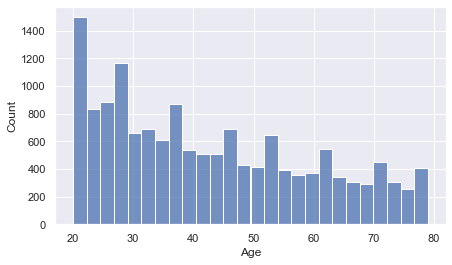

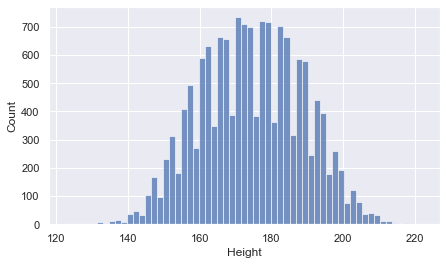

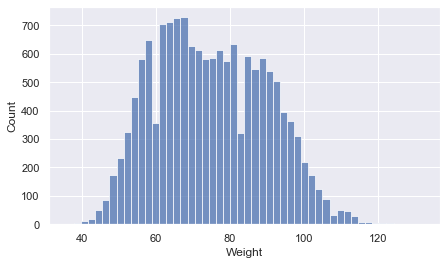

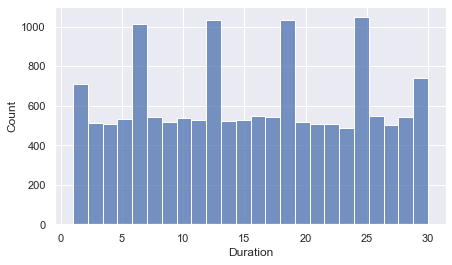

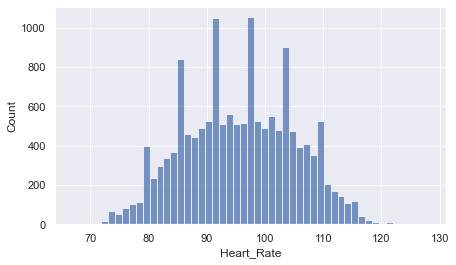

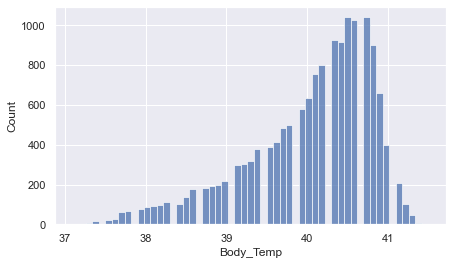

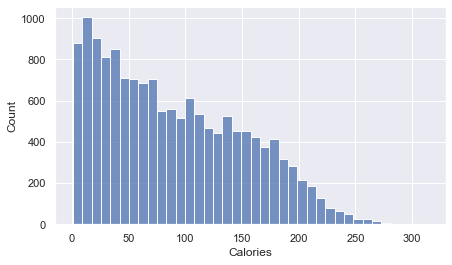

In [343]:
for i in combined_data.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(data = combined_data, x = i)
    plt.show()

TO FIND THE CORRELATION IN THE DATA

<AxesSubplot:>

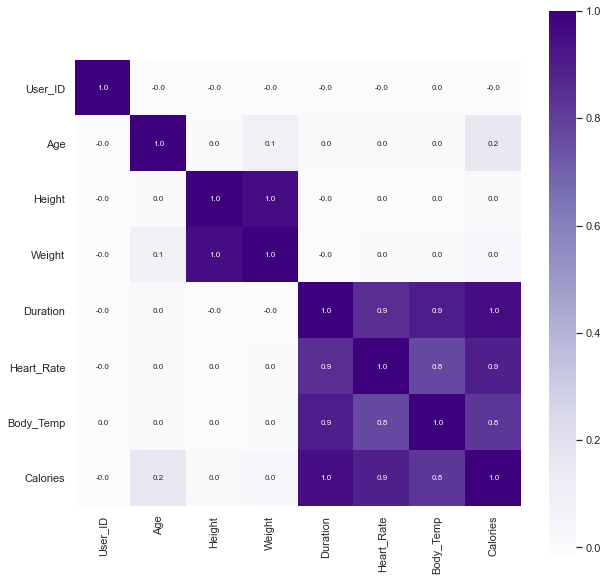

In [344]:
correlation = combined_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

By looking at above plots, we can see that 'Duration', 'Heart_Rate', 'Body_Temp' are interesting columns for the prediction of calories burnt.

PREPARE FOR MODEL BUILDING

Model with 'Duration' column

In [361]:
X = combined_data[['Duration']]
Y = combined_data['Calories']   #target feature

In [362]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(12000, 1) (3000, 1)
(12000,) (3000,)


In [363]:
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

In [364]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_pred, Y_test)
print('Root Mean Squared Error: {}'.format(np.sqrt(mse)))

Root Mean Squared Error: 18.664969439254918


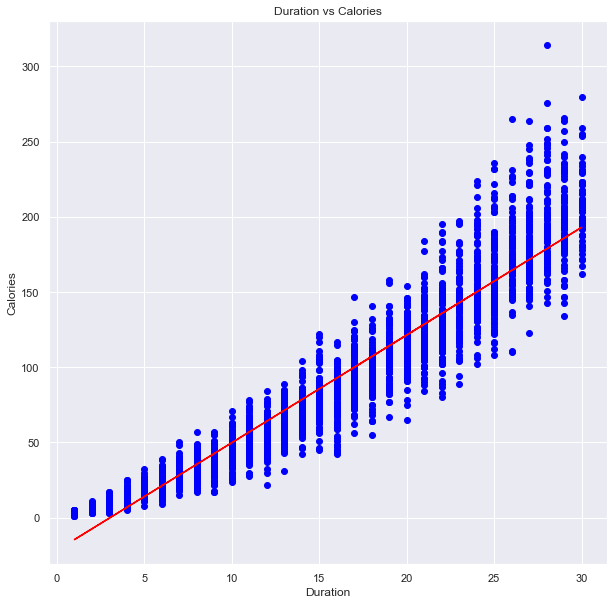

In [367]:
plt.figure(figsize=(10,10))
plt.scatter(X_test, Y_test, color='blue') # plotting the observation line
plt.plot(X_test, y_pred , color='red') # plotting the regression line
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.title("Duration vs Calories")
plt.show()

To prepare model with All columns (that includes 'Gender' as categorical column), we need to convert 'Gender' column from str to numeric.

We can map as following:

'Male':0
'Female':1

In [350]:
combined_data.replace({'Gender':{'male':0,'female':1}},inplace=True)
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


MODEL EVALUATION WITH ALL COLUMNS

In [351]:
X = combined_data.drop('Calories', axis=1)
Y = combined_data['Calories']   #target feature

In [352]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(12000, 8) (3000, 8)
(12000,) (3000,)


Let's evaluate with different models which gives the best

1. Linear regression

In [353]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
preds = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, preds))
r2 = r2_score(Y_test, preds)

print(f'Model=LinearRegression, RMSE={rmse:.3f}, R2={r2:.3f}')

Model=LinearRegression, RMSE=11.404, R2=0.967


2. Decision Tree

In [354]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Y_train)
preds = dt.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, preds))
r2 = r2_score(Y_test, preds)

print(f'Model=DecisionTree, RMSE={rmse:.3f}, R2={r2:.3f}')

Model=DecisionTree, RMSE=5.497, R2=0.992


3. Random Forest

In [355]:
rf = RandomForestRegressor(n_estimators=30, random_state=42)
rf.fit(X_train, Y_train)
preds = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, preds))
r2 = r2_score(Y_test, preds)

print(f'Model=RandomForest, RMSE={rmse:.3f}, R2={r2:.3f}')

Model=RandomForest, RMSE=2.930, R2=0.998


We can see from above, RandomForest model is giving us best R2_Score on validation dataset.

In [356]:
accuracy=rf.score(X_train,Y_train)
print('Accuracy of the model:',accuracy*100,'%')

Accuracy of the model: 99.95714722102481 %


In conclusion, Random forest is highly accurate in predicting the calories burnt with 99%